# Building neural *network*

In [41]:
# import libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [4]:
# Getting GPU device for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [14]:
# Defining NN class
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(32*32, 512),nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(), nn.Linear(512, 10), nn.ReLU()
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [15]:
model = NeuralNet().to(device)
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [16]:
# Calling the model on the input returns a 10-dimensional tensor with raw predicted values for each class. 
# We get the prediction probabilities by passing it through an instance of the nn.Softmax module.
x = torch.rand(1, 32, 32, device=device)
logits = model(x)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f"Predicted_class:{y_pred}")

Predicted_class:tensor([1], device='cuda:0')


In [17]:
# Model Layers
# a sample minibatch of 3 images of size 32x32 and see what happens to it as we pass it through the network.
inp_img = torch.rand(3,32,32)
print(inp_img.size())

torch.Size([3, 32, 32])


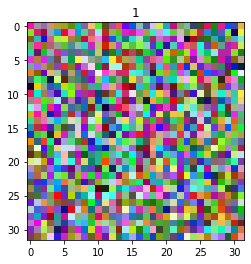

In [42]:
img, label = inp_img, 1
plt.title('1')
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()

In [19]:
# nn.Flatten layer to convert each 3D 32x32 image into a contiguous array of 1024 pixel values ( the minibatch dimension (at dim=0) is maintained).
flatten = nn.Flatten()
flat_img = flatten(inp_img)
print(flat_img.size())

torch.Size([3, 1024])


In [75]:
5^16

21

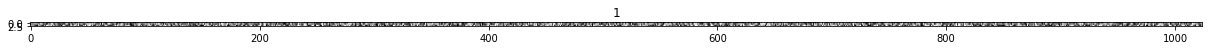

In [74]:
figure = plt.figure(figsize=(5^16,1))
img, label = flat_img.detach().numpy(), 1
plt.title('1')
plt.imshow(img, cmap="gray")
plt.show()

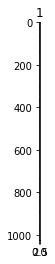

In [50]:
img, label = flat_img, 1
plt.title('1')
plt.imshow(img.permute(1,0), cmap="gray")
plt.show()

In [28]:
# Linear layer is a module that applies a linear transformation on the input using its stored weights and biases.
layer1 = nn.Linear(in_features=32*32, out_features=20)
hidden1 = layer1(flat_img)
print(hidden1.size())

torch.Size([3, 20])


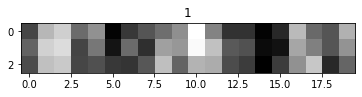

In [54]:
img, label = hidden1.detach().numpy(), 1
plt.title('1')
plt.imshow(img, cmap="gray")
plt.show()

In [22]:
# ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}\n\n")

Before ReLU: tensor([[ 7.7448e-02,  1.3035e-01, -2.5015e-01, -1.4964e-01, -3.9875e-02,
          4.4157e-01,  3.6497e-02,  2.0524e-01, -1.5328e-01,  4.9740e-01,
          6.6329e-01, -6.9149e-02,  4.4564e-01,  4.4682e-01,  3.7606e-01,
          1.0783e-01, -1.8968e-01,  2.2854e-01, -6.6249e-01,  2.2925e-01,
          7.6865e-02,  2.8094e-01, -1.7286e-01, -2.6881e-02, -3.5643e-01,
          4.2098e-01,  5.6742e-02,  3.6145e-01, -2.0751e-03, -2.8203e-01,
          2.8368e-01,  2.5020e-01,  1.4287e-01,  3.4470e-01, -1.0841e+00,
          6.0605e-01, -7.2939e-04,  5.0810e-01, -3.8728e-02, -4.4121e-01,
          3.0312e-01,  6.5737e-01,  1.6093e-01,  5.0428e-01,  3.5088e-03,
         -3.1721e-01, -6.0003e-01,  2.2427e-01,  2.7565e-01, -1.7747e-01,
          2.3349e-01,  3.0593e-01, -1.5251e-01, -1.8782e-01, -3.0749e-01,
         -6.8855e-02, -1.2855e-02,  1.3681e-02, -9.8695e-02, -2.2815e-01,
          3.0746e-01, -4.7183e-01,  2.5715e-01,  4.7581e-01, -1.0459e-01,
          7.7461e-02, -1.

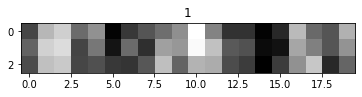

In [55]:
img, label = hidden1.detach().numpy(), 1
plt.title('1')
plt.imshow(img, cmap="gray")
plt.show()

In [29]:
# nn.Sequential:
# nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. 
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_img = torch.rand(3,32,32)
logits = seq_modules(inp_img)

In [31]:
print(logits.shape)

torch.Size([3, 10])


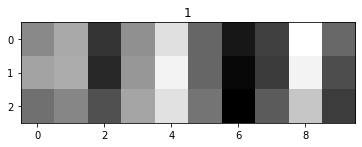

In [56]:
img, label = logits.detach().numpy(), 1
plt.title('1')
plt.imshow(img, cmap="gray")
plt.show()

In [32]:
# nn.Softmax
# The last linear layer of the neural network returns logits - raw values in [-infty, infty] - 
# which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. 
# dim parameter indicates the dimension along which the values must sum to 1.
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)

In [57]:
print(pred_prob.shape)

torch.Size([3, 10])


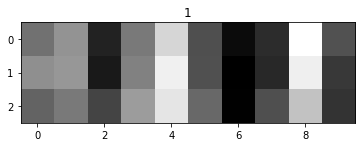

In [58]:
img, label = pred_prob.detach().numpy(), 1
plt.title('1')
plt.imshow(img, cmap="gray")
plt.show()

In [39]:
# Model parameters
print("Model structure: ", model, '\n\n')

for name, param in model.named_parameters():
  print(f"Layers name: {name} | Param Size: {param.size()} | Values: {param[:2]} \n")

Model structure:  NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layers name: linear_relu_stack.0.weight | Param Size: torch.Size([512, 1024]) | Values: tensor([[-0.0168,  0.0172, -0.0305,  ...,  0.0057,  0.0122,  0.0157],
        [ 0.0247,  0.0174, -0.0095,  ...,  0.0197, -0.0040, -0.0014]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layers name: linear_relu_stack.0.bias | Param Size: torch.Size([512]) | Values: tensor([0.0109, 0.0258], device='cuda:0', grad_fn=<SliceBackward>) 

Layers name: linear_relu_stack.2.weight | Param Size: torch.Size([512, 512]) | Values: tensor([[ 0.0334, -0.0439, -0.0437,  ..., -0.0264,  0.0019,  0.0105],
        [-0.0346, -0.0239,  0.0349,  ...,  0.0262, -0.0134,  